In [1]:
pip install requests beautifulsoup4 nltk


Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import requests
from bs4 import BeautifulSoup
import time
import random
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from urllib.parse import urlparse
import re
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from collections import Counter
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Download necessary NLTK resources (run these only once)
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /Users/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Initializing some websites for each category(20 in all)

In [3]:
categories = {
    "Technology": [
        "https://techcrunch.com",
        "https://www.wired.com.",
        "https://www.theverge.com/tech",
        "https://www.cnet.com/"
    ],
    "Science": [
        "https://www.scientificamerican.com",
        "https://www.nature.com",
        "https://www.sciencenews.org",
        "https://www.newscientist.com",
        "https://www.livescience.com"
    ],
    "Health": [
        "https://www.webmd.com",
        "https://www.medicalnewstoday.com",
        "https://www.healthline.com",
        "https://www.mayoclinic.org",
        "https://www.cdc.gov"
    ],
    "Finance": [
        "https://www.investopedia.com",
        "https://www.ft.com",
        "https://www.wsj.com",
        "https://finance.yahoo.com",
        "https://www.marketwatch.com"
    ],
    "Sports": [
        "https://www.espn.com",
        "https://www.bbc.com/sport",
        "https://www.sportskeeda.com",
        "https://www.si.com",
        "https://www.skysports.com"
    ],
    "Politics": [
        "https://www.npr.org/sections/politics",
        "https://www.bbc.com/news/politics",
        "https://www.aljazeera.com",
        "https://www.politico.com",
        "https://www.cnn.com/politics",
        "https://www.reuters.com/",
        "https://www.vox.com/"
    ],
    "Business": [
        "https://www.forbes.com",
        "https://www.bloomberg.com",
        "https://www.cnbc.com",
        "https://www.wsj.com/business",
        "https://www.nytimes.com"
    ],
    "Entertainment": [
        "https://www.hollywoodreporter.com",
        "https://www.variety.com",
        "https://www.rollingstone.com",
        "https://www.etonline.com",
        "https://www.billboard.com"
    ],
    "Education": [
        "https://www.edweek.org",
        "https://www.theguardian.com/education",
        "https://www.insidehighered.com",
        "https://www.educationnext.org",
        "https://www.chronicle.com/education",
        "https://www.highereddive.com"
    ],
    "AI & Machine Learning": [
        "https://towardsdatascience.com",
        "https://www.analyticsvidhya.com",
        "https://venturebeat.com/ai",
        "https://www.fast.ai",
        "https://www.kdnuggets.com"
    ],
    "Environment": [      
        "https://www.treehugger.com",     
        "https://www.theguardian.com/",
        "https://www.earthday.org/"
    ],
    "Food": [
        "https://www.seriouseats.com",
        "https://www.bonappetit.com",
        "https://www.foodandwine.com",
        "https://www.eater.com",
        "https://www.tasteofhome.com",
        "https://www.epicurious.com",
        "https://www.saveur.com/"
    ],
    "Travel": [
        "https://www.travelandleisure.com",
        "https://www.cntraveler.com",
        "https://www.nationalgeographic.com/travel",
        "https://www.atlasobscura.com",
        "https://trips.roughguides.com"
    ],
    "Fashion": [
        "https://www.vogue.com",
        "https://www.elle.com",
        "https://www.gq.com",
        "https://www.harpersbazaar.com",
        "https://www.instyle.com",
        "https://www.thecut.co",
        "https://www.wmagazine.com/"
    ],
    "Music": [
        "https://pitchfork.com",
        "https://www.billboard.com",
        "https://www.nme.com",
        "https://www.rollingstone.com/music",
        "https://www.stereogum.com"
    ],
    "Movies": [
        "https://www.imdb.com",
        "https://www.rottentomatoes.com",
        "https://www.metacritic.com",
        "https://www.empireonline.com",
        "https://www.variety.com/film"
    ],
    "Automobiles": [
        "https://www.caranddriver.com",
        "https://www.cars.com",
        "https://www.autoweek.com",
        "https://www.roadandtrack.com",
        "https://www.motorauthority.com/"
    ],
    "History": [
        "https://www.history.com",
        "https://www.worldhistory.org",
        "https://www.bbc.co.uk/history",
        "https://www.historyextra.com",
        "https://www.ancient-origins.net",
        "https://www.historytoday.com",
        "https://www.worldhistory.org",
    ],
    "Psychology": [
        "https://www.psychologytoday.com",
        "https://www.verywellmind.com",
        "https://www.apa.org/news",
        "https://www.scientificamerican.com/health/mental-health",
        "https://www.medicalnewstoday.com/categories/mental-health"
    ],
    "Cryptocurrency": [
        "https://www.coindesk.com",
        "https://www.cointelegraph.com",
        "https://decrypt.co",
        "https://www.cryptonews.com",
        "https://www.newsbtc.com",
        "https://cryptoslate.com",
        "https://bitcoinmagazine.com"
    ]
}


In [4]:
category_list = categories.keys()

### Displaying the list of categories

In [5]:
category_list

dict_keys(['Technology', 'Science', 'Health', 'Finance', 'Sports', 'Politics', 'Business', 'Entertainment', 'Education', 'AI & Machine Learning', 'Environment', 'Food', 'Travel', 'Fashion', 'Music', 'Movies', 'Automobiles', 'History', 'Psychology', 'Cryptocurrency'])

## Make directory

In [6]:
output_dir = "/Users/user/Desktop/scraped_articles"
os.makedirs(output_dir, exist_ok=True)

### Cleaning data

In [7]:
def clean_text(text):
    """
    Clean text by removing HTML tags, URLs, punctuation, numbers, and stop words.
    """
    text = re.sub(r'<.*?>', ' ', text)        
    text = re.sub(r'http\S+', '', text)          
    text = re.sub(r'[^A-Za-z\s]', ' ', text)    
    text = text.lower()
    tokens = word_tokenize(text)
    cleaned_tokens = [word for word in tokens if word not in stopwords.words('english') 
                      and word not in string.punctuation]
    return ' '.join(cleaned_tokens)

### Custom patterns for scraping articles from the websites

In [8]:
CUSTOM_PATTERNS = {
    "https://techcrunch.com": [r"/2025/"],
    "https://www.wired.com": [r"/story/"],
    "https://www.theverge.com/tech": [r"/news/"],
    "www.nature.com": [r"/articles/", r"/news/"],
    "www.scientificamerican.com": [r"/article/", r"/science/"],
    "www.sciencenews.org": [r"/article/"],
    "www.newscientist.com": [r"/article/"],
    "www.livescience.com": [r"/archaeology/", r"/animals/"],
    "www.webmd.com": [r"/fitness-exercise/"],
    "www.medicalnewstoday.com": [r"/articles/"],
    "www.healthline.com": [r"/nutrition/", r"/fitness/"],
    "www.mayoclinic.org": [r"/healthy-lifestyle/"],
    "www.investopedia.com": [r"/articles"],
    "www.wsj.com": [r"/business/"],
    "www.marketwatch.com": [r"/story/"],
    "www.bbc.com": [r"/sport/cricket/"],
    "www.sportskeeda.com": [r"/cricket/"],
    "www.politico.com": [r"/news/"],
    "www.nytimes.com": [r"/live/2025/"],
    "www.insidehighered.com": [r"/news/"],
    "www.bonappetit.com": [r"/story/"],
    "www.foodandwine.com": [r"/news/"],
    "www.lonelyplanet.com": [r"/articles/"],
    "www.tripadvisor.com": [r"/Tourism"],
    "www.nationalgeographic.com/travel": [r"/travel/article/"],
    "www.cntraveler.com": [r"/story/"],
    "www.vogue.com": [r"/article/"],
    "www.elle.com": [r"/runway/"],
    "www.gq.com": [r"/story/"],
    "www.instyle.com": [r"/lifestyle/travel/"],
    "www.nme.com": [r"/news/"],
    "www.metacritic.com":[r"/pictures/march-2025-movie-preview-mickey-17-black-bag/"],
    "www.empireonline.com": [r"/tv/news/"],
    "www.caranddriver.com": [r"/reviews/"],
    "www.topgearmag.in": [r"/electric/"],
    "www.motortrend.com": [r"/car-reviews/"],
    "www.history.com": [r"/this-day-in-history"],
    "www.historyextra.com": [r"/period/early-modern/"],
    "www.worldhistory.org": [r"/books/"],
    "www.verywellmind.com": [r"/generalized-anxiety-disorder-4166193"],
    "www.coindesk.com": [r"/business/2025/"],
    "decrypt.co":[r"/news-explorer?"],
    "www.newsbtc.com": [r"/crypto/"],
    "www.cnet.com": [r"/tech/"],
    "finance.yahoo.com": [r"/news/"],
    "www.reuters.com": [r"/legal/"],
    "www.epicurious.com": [r"/ingredients/"],
    "www.highereddive.com": [r"/news/"],
    "www.atlasobscura.com": [r"/adventures/"],
    "www.thecut.co": [r"/blog/"],
    "www.historytoday.com": [r"/archive/feature/"],
    "www.worldhistory.org": [r"/xres/"],
    "www.autoweek.com": [r"/news/"],
    "www.roadandtrack.com": [r"/news/"],
    "cryptoslate.com": [r"/data/"],
    "bitcoinmagazine.com": [r"/bitcoin-glossary"],
    "www.treehugger.com": [r"/science-4846043"],
    "grist.org": [r"/energy/"],
    "www.vox.com" : [r"/politics"],
    "www.theguardian.com" : [r"/environment/2025"],
    "www.earthday.org" : [r"/toolkit-how-to-shop-for-your-clothes/"],
    "www.wmagazine.com": [r"/fashion/"],
    "www.saveur.com": [r"/culture/"],
    "trips.roughguides.com": [r"/trip/"],
    "www.motorauthority.com": [r"/news/"]
    # ...
}

In [9]:
def extract_article_links(category_url):
    headers = {"User-Agent": "Mozilla/5.0"}
    links = []
    domain = urlparse(category_url).netloc  
    
    try:
        response = requests.get(category_url, headers=headers, timeout=10)
        response.raise_for_status()
    except Exception as e:
        print(f"Failed to retrieve {category_url}: {e}")
        return links

    soup = BeautifulSoup(response.text, "html.parser")
    
    patterns = CUSTOM_PATTERNS.get(domain, [])
    
    for a_tag in soup.find_all("a", href=True):
        href = a_tag["href"]
        if href.startswith("https://"):
            if any(pattern in href for pattern in patterns):
                links.append(href)
            elif re.search(r'/20\d{2}/', href):
                links.append(href)

    return list(set(links))


In [10]:
def scrape_article(url):
    """
    Scrape an individual article for its title, publication date, and content.
    """
    headers = {"User-Agent": "Mozilla/5.0"}
    try:
        response = requests.get(url, headers=headers, timeout=10)
        response.raise_for_status()
    except Exception as e:
        print(f"Failed to scrape {url}: {e}")
        return ""
    
    soup = BeautifulSoup(response.text, "html.parser")
    
    # Extract title
    title = soup.title.get_text().strip() if soup.title else "No Title"
    
    # Extract publication date (example: checking common meta tags)
    pub_date = "Date not found"
    for meta in soup.find_all("meta"):
        if meta.get("property") == "article:published_time" or meta.get("name") in ["pubdate", "publication_date"]:
            pub_date = meta.get("content", "Date not found")
            break
    
    # Extract main article content (using <p> tags)
    paragraphs = soup.find_all('p')
    content = "\n".join([p.get_text().strip() for p in paragraphs])
    
    full_text = f"Title: {title}\nPublication Date: {pub_date}\nContent:\n{content}"
    return clean_text(full_text)

In [10]:
def scrape_category(category_name, website_list, articles_per_site=5, max_websites=3):
    """
    For each category, try scraping from websites until max_websites have been processed.
    For each website, scrape up to `articles_per_site` articles.
    """
    category_data = ""
    websites_scraped = 0
    webs = []
    for website in website_list:
        if websites_scraped >= max_websites:
            break  

        print(f"Processing website: {website} for category: {category_name}")
        article_links = extract_article_links(website)
        if not article_links:
            print(f"No article links found for {website}.")
            continue

        selected_links = article_links[:articles_per_site] if len(article_links) >= articles_per_site else article_links
        for link in selected_links:
            print(f"Scraping article: {link}")
            article_text = scrape_article(link)
            category_data += article_text + "\n\n"
            time.sleep(random.uniform(2, 4))  

        websites_scraped += 1
        
    return category_data, websites_scraped





In [11]:
len(categories.keys())

20

In [12]:
from tqdm import tqdm
from sklearn.model_selection import train_test_split

output_dir = "/Users/user/Desktop/scraped_articles"
train_dir = os.path.join(output_dir, "train")
test_dir = os.path.join(output_dir, "test")

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
wss = 0
w = []

def count_txt_files(directory):
    """Count the number of .txt files in a directory."""
    return len([f for f in os.listdir(directory) if f.endswith('.txt')])

In [64]:
def prepare_scrap_data(train_dir, test_dir, articles_per_site=3):
    train_file_count = count_txt_files(train_dir)
    test_file_count = count_txt_files(test_dir)

    print(f"Train folder file count: {train_file_count}")
    print(f"Test folder file count: {test_file_count}")
    wss = 0
    w = []
    if train_file_count == len(categories.keys()) and test_file_count == len(categories.keys()):
        print(f"Both train and test folders already contain {len(categories.keys())} files. Skipping scraping.")
    else:
        print("Not all files are present. Proceed with scraping process.")
        for category, websites in tqdm(list(categories.items()), desc="Processing categories", total=len(categories)):
            print(f"\n=== Processing category: {category} ===")
            data, ws = scrape_category(category, websites, articles_per_site=articles_per_site, max_websites=3)

            raw_file_path = os.path.join(output_dir, f"{category}_raw.txt")
            with open(raw_file_path, "w", encoding="utf-8") as f:
                f.write(data)

            articles = [article.strip() for article in data.split("\n\n") if article.strip()]

            if not articles:
                print(f"No articles found for {category}.")
                continue

            train_articles, test_articles = train_test_split(articles, test_size=0.2, random_state=42)

            train_file_path = os.path.join(train_dir, f"{category}.txt")
            with open(train_file_path, "w", encoding="utf-8") as f:
                f.write("\n\n".join(train_articles))

            test_file_path = os.path.join(test_dir, f"{category}.txt")
            with open(test_file_path, "w", encoding="utf-8") as f:
                f.write("\n\n".join(test_articles))

            print(f"Saved train data for '{category}' to {train_file_path}")
            print(f"Saved test data for '{category}' to {test_file_path}")
            print(f"No of websites scraped for {category}: {ws}")

            wss += ws
            w.append(ws)

        print("Article scraping, splitting, and data cleaning complete.")
        print(f"Total number of websites scraped: {wss}")
        print(f"Websites scraped per category: {w}")
    return ws, wss


In [13]:
train_dir = os.path.join(output_dir, "train")
test_dir = os.path.join(output_dir, "test")

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

#ws, wss = prepare_scrap_data(train_dir, test_dir, 10)

### Building a text classifier, to classify text into the 20 categories. The generated dataset had been partitioned into train and test while scraping 


In [14]:
def prepare_data(categories, data_dir):
    label2idx = {cat: idx for idx, cat in enumerate(categories)}

    data = []
    for cat in categories:
        file_path = os.path.join(data_dir, f"{cat}.txt")
        with open(file_path, "r", encoding="utf-8") as f:
            content = f.read().strip()
        # Split articles by two newlines
            articles = content.split("\n\n")
            articles = [a.strip() for a in articles if a.strip()]
            for article in articles:
                data.append((article, label2idx[cat]))
    return data


In [15]:
data_dir1 = "/Users/user/Desktop/scraped_articles/test"
data_dir2 = "/Users/user/Desktop/scraped_articles/train"

test_data = prepare_data(category_list, data_dir1)
train_data = prepare_data(category_list, data_dir2)

In [16]:
train_data

[('title canoo ceo buying bankrupt ev startup assets techcrunch publication date content latest ai amazon apps biotech health climate cloud computing commerce crypto enterprise evs fintech fundraising gadgets gaming google government policy hardware instagram layoffs media entertainment meta microsoft privacy robotics security social space startups tiktok transportation venture events startup battlefield strictlyvc newsletters podcasts videos partner content techcrunch brand studio crunchboard contact us ceo canoo buying nearly defunct ev startup assets bankruptcy according court filing new entity controlled ceo anthony aquila offered purchase substantially assets million cash sale also wipe clean million debt canoo owed financial firm run aquila loaned money startup final months sale proposal comes six weeks canoo filed chapter bankruptcy liquidation delaware wound business startup went public part merger special purpose acquisition company never sold handful electric vans government 

In [17]:
print("Total samples:", len(train_data))

Total samples: 228


In [18]:
train_texts = [d[0] for d in train_data]
train_labels = [d[1] for d in train_data]

In [19]:
test_texts = [d[0] for d in test_data]
test_labels = [d[1] for d in test_data]

In [20]:
print("Train samples:", len(train_texts))
print("Test samples:", len(test_texts))

Train samples: 228
Test samples: 65


### Using the TFIDF vectorizer with a maximum of 5000 features: TF-IDF is a technique to represent words based on their importance in a document relative to a set of documents (corpus).

In [21]:
max_features = 5000  
vectorizer = TfidfVectorizer(max_features=max_features, stop_words='english')
train_vectors = vectorizer.fit_transform(train_texts)
test_vectors = vectorizer.transform(test_texts)

In [22]:
train_vectors = train_vectors.toarray()
test_vectors = test_vectors.toarray()
input_dim = train_vectors.shape[1]
print("TF-IDF input dimension:", input_dim)

TF-IDF input dimension: 5000


## Using an LSTM model to classify text into one of 20 categories

In [23]:
class TFIDFDataset(Dataset):
    def __init__(self, vectors, labels):
        self.vectors = vectors
        self.labels = labels
    
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        vector = self.vectors[idx]
        label = self.labels[idx]
        return torch.tensor(vector, dtype=torch.float32), torch.tensor(label, dtype=torch.long)

In [24]:
train_dataset = TFIDFDataset(train_vectors, train_labels)
test_dataset = TFIDFDataset(test_vectors, test_labels)

In [25]:
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [56]:
import torch
import torch.nn as nn

class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers=2, dropout=0.3):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers=num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.unsqueeze(1)  # Ensure input has shape (batch_size, 1, input_dim)
        lstm_out, _ = self.lstm(x)  # lstm_out: (batch_size, 1, hidden_dim)
        lstm_out = lstm_out[:, -1, :]  # Last hidden state
        out = self.fc(lstm_out)  # Fully connected layer for classification
        return out


hidden_dim = 128
num_layers = 2
output_dim = len(categories)

model = LSTMModel(input_dim, hidden_dim, output_dim, num_layers=num_layers)

print(model)


LSTMModel(
  (lstm): LSTM(5000, 128, num_layers=2, batch_first=True, dropout=0.3)
  (fc): Linear(in_features=128, out_features=20, bias=True)
)


In [57]:
import torch
import torch.optim as optim
import torch.nn as nn
from tqdm import tqdm

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
num_epochs = 200
patience = 40  # Number of epochs to wait for improvement

# Best test accuracy tracking
best_test_acc = 0
epochs_without_improvement = 0
best_model_state = None

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(num_epochs):
    # Training Phase
    model.train()
    total_loss = 0
    correct_train = 0
    total_train = 0
    
    for vectors, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        vectors, labels = vectors.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(vectors)
        loss = criterion(outputs, labels)
        
        # Backpropagation
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        preds = torch.argmax(outputs, dim=1)
        correct_train += (preds == labels).sum().item()
        total_train += labels.size(0)
    
    # Compute training loss and accuracy
    avg_loss = total_loss / len(train_loader)
    train_acc = correct_train / total_train if total_train > 0 else 0

    # Evaluation Phase
    model.eval()
    correct_test = 0
    total_test = 0
    
    with torch.no_grad():
        for vectors, labels in test_loader:
            vectors, labels = vectors.to(device), labels.to(device)
            outputs = model(vectors)
            preds = torch.argmax(outputs, dim=1)
            correct_test += (preds == labels).sum().item()
            total_test += labels.size(0)

    test_acc = correct_test / total_test if total_test > 0 else 0

    # Print epoch summary
    print(f"Epoch {epoch+1}: Train Loss = {avg_loss:.4f}, Train Acc = {train_acc:.4f}, Test Acc = {test_acc:.4f}")
    
    # Check for improvement
    if test_acc > best_test_acc:
        best_test_acc = test_acc
        best_model_state = model.state_dict()  # Save best model state
        epochs_without_improvement = 0
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= patience:
            print(f"Early stopping triggered after {epoch+1} epochs. Best Test Accuracy: {best_test_acc:.4f}")
            break

if best_model_state:
    model.load_state_dict(best_model_state)
    print("Best model restored with Test Accuracy:", best_test_acc)


Epoch 1/200: 100%|███████████████████████████████| 8/8 [00:00<00:00, 100.45it/s]


Epoch 1: Train Loss = 2.9932, Train Acc = 0.0658, Test Acc = 0.0923


Epoch 2/200: 100%|███████████████████████████████| 8/8 [00:00<00:00, 150.68it/s]


Epoch 2: Train Loss = 2.9708, Train Acc = 0.1140, Test Acc = 0.0923


Epoch 3/200: 100%|███████████████████████████████| 8/8 [00:00<00:00, 152.52it/s]


Epoch 3: Train Loss = 2.9566, Train Acc = 0.1053, Test Acc = 0.0923


Epoch 4/200: 100%|███████████████████████████████| 8/8 [00:00<00:00, 154.16it/s]


Epoch 4: Train Loss = 2.9236, Train Acc = 0.1053, Test Acc = 0.0923


Epoch 5/200: 100%|███████████████████████████████| 8/8 [00:00<00:00, 151.81it/s]


Epoch 5: Train Loss = 2.8710, Train Acc = 0.1184, Test Acc = 0.1231


Epoch 6/200: 100%|███████████████████████████████| 8/8 [00:00<00:00, 146.87it/s]


Epoch 6: Train Loss = 2.8030, Train Acc = 0.1491, Test Acc = 0.1231


Epoch 7/200: 100%|███████████████████████████████| 8/8 [00:00<00:00, 152.74it/s]


Epoch 7: Train Loss = 2.7102, Train Acc = 0.1535, Test Acc = 0.1231


Epoch 8/200: 100%|███████████████████████████████| 8/8 [00:00<00:00, 153.26it/s]


Epoch 8: Train Loss = 2.5929, Train Acc = 0.1798, Test Acc = 0.1231


Epoch 9/200: 100%|███████████████████████████████| 8/8 [00:00<00:00, 157.53it/s]


Epoch 9: Train Loss = 2.5224, Train Acc = 0.1535, Test Acc = 0.1231


Epoch 10/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 153.98it/s]


Epoch 10: Train Loss = 2.4586, Train Acc = 0.1930, Test Acc = 0.1538


Epoch 11/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 151.80it/s]


Epoch 11: Train Loss = 2.2637, Train Acc = 0.3202, Test Acc = 0.2615


Epoch 12/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 154.75it/s]


Epoch 12: Train Loss = 2.0470, Train Acc = 0.4561, Test Acc = 0.3077


Epoch 13/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 154.36it/s]


Epoch 13: Train Loss = 1.8400, Train Acc = 0.5307, Test Acc = 0.3692


Epoch 14/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 149.33it/s]


Epoch 14: Train Loss = 1.7547, Train Acc = 0.6623, Test Acc = 0.5077


Epoch 15/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 150.70it/s]


Epoch 15: Train Loss = 1.4807, Train Acc = 0.7588, Test Acc = 0.5846


Epoch 16/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 151.53it/s]


Epoch 16: Train Loss = 1.1989, Train Acc = 0.8289, Test Acc = 0.6000


Epoch 17/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 156.43it/s]


Epoch 17: Train Loss = 0.9797, Train Acc = 0.8772, Test Acc = 0.6615


Epoch 18/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 154.93it/s]


Epoch 18: Train Loss = 0.7517, Train Acc = 0.8947, Test Acc = 0.6462


Epoch 19/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 152.05it/s]


Epoch 19: Train Loss = 0.6448, Train Acc = 0.9079, Test Acc = 0.6923


Epoch 20/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 155.82it/s]


Epoch 20: Train Loss = 0.5181, Train Acc = 0.9123, Test Acc = 0.6615


Epoch 21/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 148.02it/s]


Epoch 21: Train Loss = 0.5178, Train Acc = 0.9167, Test Acc = 0.6462


Epoch 22/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 145.70it/s]


Epoch 22: Train Loss = 0.3921, Train Acc = 0.9123, Test Acc = 0.6462


Epoch 23/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 142.42it/s]


Epoch 23: Train Loss = 0.3227, Train Acc = 0.9167, Test Acc = 0.6615


Epoch 24/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 152.73it/s]


Epoch 24: Train Loss = 0.3025, Train Acc = 0.9254, Test Acc = 0.6769


Epoch 25/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 152.23it/s]


Epoch 25: Train Loss = 0.2682, Train Acc = 0.9254, Test Acc = 0.6615


Epoch 26/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 153.30it/s]


Epoch 26: Train Loss = 0.2398, Train Acc = 0.9298, Test Acc = 0.6615


Epoch 27/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 150.16it/s]


Epoch 27: Train Loss = 0.2666, Train Acc = 0.9254, Test Acc = 0.6769


Epoch 28/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 149.20it/s]


Epoch 28: Train Loss = 0.2135, Train Acc = 0.9211, Test Acc = 0.6923


Epoch 29/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 147.34it/s]


Epoch 29: Train Loss = 0.2057, Train Acc = 0.9386, Test Acc = 0.6769


Epoch 30/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 149.67it/s]


Epoch 30: Train Loss = 0.1889, Train Acc = 0.9474, Test Acc = 0.6923


Epoch 31/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 145.61it/s]


Epoch 31: Train Loss = 0.2562, Train Acc = 0.9518, Test Acc = 0.6923


Epoch 32/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 144.41it/s]


Epoch 32: Train Loss = 0.1674, Train Acc = 0.9561, Test Acc = 0.7077


Epoch 33/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 151.37it/s]


Epoch 33: Train Loss = 0.1686, Train Acc = 0.9386, Test Acc = 0.6923


Epoch 34/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 151.80it/s]


Epoch 34: Train Loss = 0.1995, Train Acc = 0.9605, Test Acc = 0.7231


Epoch 35/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 155.12it/s]


Epoch 35: Train Loss = 0.1361, Train Acc = 0.9561, Test Acc = 0.6923


Epoch 36/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 154.26it/s]


Epoch 36: Train Loss = 0.1325, Train Acc = 0.9561, Test Acc = 0.6769


Epoch 37/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 156.23it/s]


Epoch 37: Train Loss = 0.1564, Train Acc = 0.9605, Test Acc = 0.6769


Epoch 38/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 153.70it/s]


Epoch 38: Train Loss = 0.1162, Train Acc = 0.9693, Test Acc = 0.6769


Epoch 39/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 157.12it/s]


Epoch 39: Train Loss = 0.1342, Train Acc = 0.9693, Test Acc = 0.6769


Epoch 40/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 152.41it/s]


Epoch 40: Train Loss = 0.1175, Train Acc = 0.9649, Test Acc = 0.6923


Epoch 41/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 152.46it/s]


Epoch 41: Train Loss = 0.1037, Train Acc = 0.9649, Test Acc = 0.6923


Epoch 42/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 152.30it/s]


Epoch 42: Train Loss = 0.1079, Train Acc = 0.9605, Test Acc = 0.6923


Epoch 43/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 156.27it/s]


Epoch 43: Train Loss = 0.1030, Train Acc = 0.9605, Test Acc = 0.6769


Epoch 44/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 154.15it/s]


Epoch 44: Train Loss = 0.1080, Train Acc = 0.9693, Test Acc = 0.6923


Epoch 45/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 155.71it/s]


Epoch 45: Train Loss = 0.0927, Train Acc = 0.9649, Test Acc = 0.6923


Epoch 46/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 155.90it/s]


Epoch 46: Train Loss = 0.0918, Train Acc = 0.9561, Test Acc = 0.6923


Epoch 47/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 155.05it/s]


Epoch 47: Train Loss = 0.0891, Train Acc = 0.9605, Test Acc = 0.6769


Epoch 48/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 154.82it/s]


Epoch 48: Train Loss = 0.1070, Train Acc = 0.9561, Test Acc = 0.6923


Epoch 49/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 156.26it/s]


Epoch 49: Train Loss = 0.0850, Train Acc = 0.9649, Test Acc = 0.6769


Epoch 50/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 154.02it/s]


Epoch 50: Train Loss = 0.0865, Train Acc = 0.9649, Test Acc = 0.6769


Epoch 51/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 153.67it/s]


Epoch 51: Train Loss = 0.0829, Train Acc = 0.9605, Test Acc = 0.6923


Epoch 52/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 153.07it/s]


Epoch 52: Train Loss = 0.1321, Train Acc = 0.9605, Test Acc = 0.6769


Epoch 53/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 154.71it/s]


Epoch 53: Train Loss = 0.0905, Train Acc = 0.9605, Test Acc = 0.6923


Epoch 54/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 153.96it/s]


Epoch 54: Train Loss = 0.1395, Train Acc = 0.9693, Test Acc = 0.6769


Epoch 55/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 158.05it/s]


Epoch 55: Train Loss = 0.1168, Train Acc = 0.9518, Test Acc = 0.6462


Epoch 56/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 158.58it/s]


Epoch 56: Train Loss = 0.0983, Train Acc = 0.9605, Test Acc = 0.6462


Epoch 57/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 159.09it/s]


Epoch 57: Train Loss = 0.0902, Train Acc = 0.9561, Test Acc = 0.6923


Epoch 58/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 159.67it/s]


Epoch 58: Train Loss = 0.0715, Train Acc = 0.9693, Test Acc = 0.6769


Epoch 59/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 141.35it/s]


Epoch 59: Train Loss = 0.0766, Train Acc = 0.9649, Test Acc = 0.6769


Epoch 60/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 153.71it/s]


Epoch 60: Train Loss = 0.0906, Train Acc = 0.9693, Test Acc = 0.6923


Epoch 61/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 157.59it/s]


Epoch 61: Train Loss = 0.0925, Train Acc = 0.9693, Test Acc = 0.6923


Epoch 62/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 156.27it/s]


Epoch 62: Train Loss = 0.0837, Train Acc = 0.9693, Test Acc = 0.7385


Epoch 63/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 155.20it/s]


Epoch 63: Train Loss = 0.0698, Train Acc = 0.9693, Test Acc = 0.7077


Epoch 64/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 156.57it/s]


Epoch 64: Train Loss = 0.0818, Train Acc = 0.9605, Test Acc = 0.6923


Epoch 65/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 154.73it/s]


Epoch 65: Train Loss = 0.0809, Train Acc = 0.9518, Test Acc = 0.6769


Epoch 66/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 156.48it/s]


Epoch 66: Train Loss = 0.1181, Train Acc = 0.9649, Test Acc = 0.6769


Epoch 67/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 156.17it/s]


Epoch 67: Train Loss = 0.0687, Train Acc = 0.9737, Test Acc = 0.6615


Epoch 68/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 155.69it/s]


Epoch 68: Train Loss = 0.0734, Train Acc = 0.9561, Test Acc = 0.6615


Epoch 69/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 153.90it/s]


Epoch 69: Train Loss = 0.0792, Train Acc = 0.9561, Test Acc = 0.6769


Epoch 70/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 155.94it/s]


Epoch 70: Train Loss = 0.1320, Train Acc = 0.9561, Test Acc = 0.6769


Epoch 71/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 155.08it/s]


Epoch 71: Train Loss = 0.0699, Train Acc = 0.9693, Test Acc = 0.6769


Epoch 72/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 154.97it/s]


Epoch 72: Train Loss = 0.1643, Train Acc = 0.9561, Test Acc = 0.6923


Epoch 73/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 154.53it/s]


Epoch 73: Train Loss = 0.1127, Train Acc = 0.9518, Test Acc = 0.6462


Epoch 74/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 149.47it/s]


Epoch 74: Train Loss = 0.0701, Train Acc = 0.9693, Test Acc = 0.6615


Epoch 75/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 151.31it/s]


Epoch 75: Train Loss = 0.0745, Train Acc = 0.9693, Test Acc = 0.6462


Epoch 76/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 154.83it/s]


Epoch 76: Train Loss = 0.0798, Train Acc = 0.9605, Test Acc = 0.6615


Epoch 77/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 158.21it/s]


Epoch 77: Train Loss = 0.0673, Train Acc = 0.9693, Test Acc = 0.6769


Epoch 78/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 160.36it/s]


Epoch 78: Train Loss = 0.0745, Train Acc = 0.9605, Test Acc = 0.6769


Epoch 79/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 156.36it/s]


Epoch 79: Train Loss = 0.0695, Train Acc = 0.9605, Test Acc = 0.6769


Epoch 80/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 156.14it/s]


Epoch 80: Train Loss = 0.0674, Train Acc = 0.9737, Test Acc = 0.6769


Epoch 81/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 152.66it/s]


Epoch 81: Train Loss = 0.0673, Train Acc = 0.9605, Test Acc = 0.6769


Epoch 82/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 156.93it/s]


Epoch 82: Train Loss = 0.0705, Train Acc = 0.9693, Test Acc = 0.6769


Epoch 83/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 154.30it/s]


Epoch 83: Train Loss = 0.0681, Train Acc = 0.9693, Test Acc = 0.6769


Epoch 84/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 154.84it/s]


Epoch 84: Train Loss = 0.1066, Train Acc = 0.9693, Test Acc = 0.6769


Epoch 85/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 149.86it/s]


Epoch 85: Train Loss = 0.0719, Train Acc = 0.9605, Test Acc = 0.6615


Epoch 86/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 156.23it/s]


Epoch 86: Train Loss = 0.1352, Train Acc = 0.9649, Test Acc = 0.6769


Epoch 87/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 157.20it/s]


Epoch 87: Train Loss = 0.1535, Train Acc = 0.9605, Test Acc = 0.6769


Epoch 88/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 154.35it/s]


Epoch 88: Train Loss = 0.0859, Train Acc = 0.9605, Test Acc = 0.6769


Epoch 89/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 156.07it/s]


Epoch 89: Train Loss = 0.1080, Train Acc = 0.9605, Test Acc = 0.6615


Epoch 90/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 161.26it/s]


Epoch 90: Train Loss = 0.0845, Train Acc = 0.9518, Test Acc = 0.6462


Epoch 91/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 157.66it/s]


Epoch 91: Train Loss = 0.0771, Train Acc = 0.9561, Test Acc = 0.6462


Epoch 92/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 155.59it/s]


Epoch 92: Train Loss = 0.0762, Train Acc = 0.9605, Test Acc = 0.6462


Epoch 93/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 153.64it/s]


Epoch 93: Train Loss = 0.0764, Train Acc = 0.9693, Test Acc = 0.6769


Epoch 94/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 154.49it/s]


Epoch 94: Train Loss = 0.0832, Train Acc = 0.9561, Test Acc = 0.6923


Epoch 95/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 154.97it/s]


Epoch 95: Train Loss = 0.0681, Train Acc = 0.9649, Test Acc = 0.6769


Epoch 96/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 154.35it/s]


Epoch 96: Train Loss = 0.0763, Train Acc = 0.9474, Test Acc = 0.6615


Epoch 97/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 155.78it/s]


Epoch 97: Train Loss = 0.0663, Train Acc = 0.9649, Test Acc = 0.6769


Epoch 98/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 154.96it/s]


Epoch 98: Train Loss = 0.0700, Train Acc = 0.9518, Test Acc = 0.6769


Epoch 99/200: 100%|██████████████████████████████| 8/8 [00:00<00:00, 155.32it/s]


Epoch 99: Train Loss = 0.0723, Train Acc = 0.9518, Test Acc = 0.6769


Epoch 100/200: 100%|█████████████████████████████| 8/8 [00:00<00:00, 157.07it/s]


Epoch 100: Train Loss = 0.0688, Train Acc = 0.9518, Test Acc = 0.6769


Epoch 101/200: 100%|█████████████████████████████| 8/8 [00:00<00:00, 156.40it/s]


Epoch 101: Train Loss = 0.0767, Train Acc = 0.9693, Test Acc = 0.6769


Epoch 102/200: 100%|█████████████████████████████| 8/8 [00:00<00:00, 155.62it/s]

Epoch 102: Train Loss = 0.1033, Train Acc = 0.9693, Test Acc = 0.6769
Early stopping triggered after 102 epochs. Best Test Accuracy: 0.7385
Best model restored with Test Accuracy: 0.7384615384615385


/Users/user/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.6769
Precision: 0.6391
Recall: 0.6769
F1-score: 0.6420


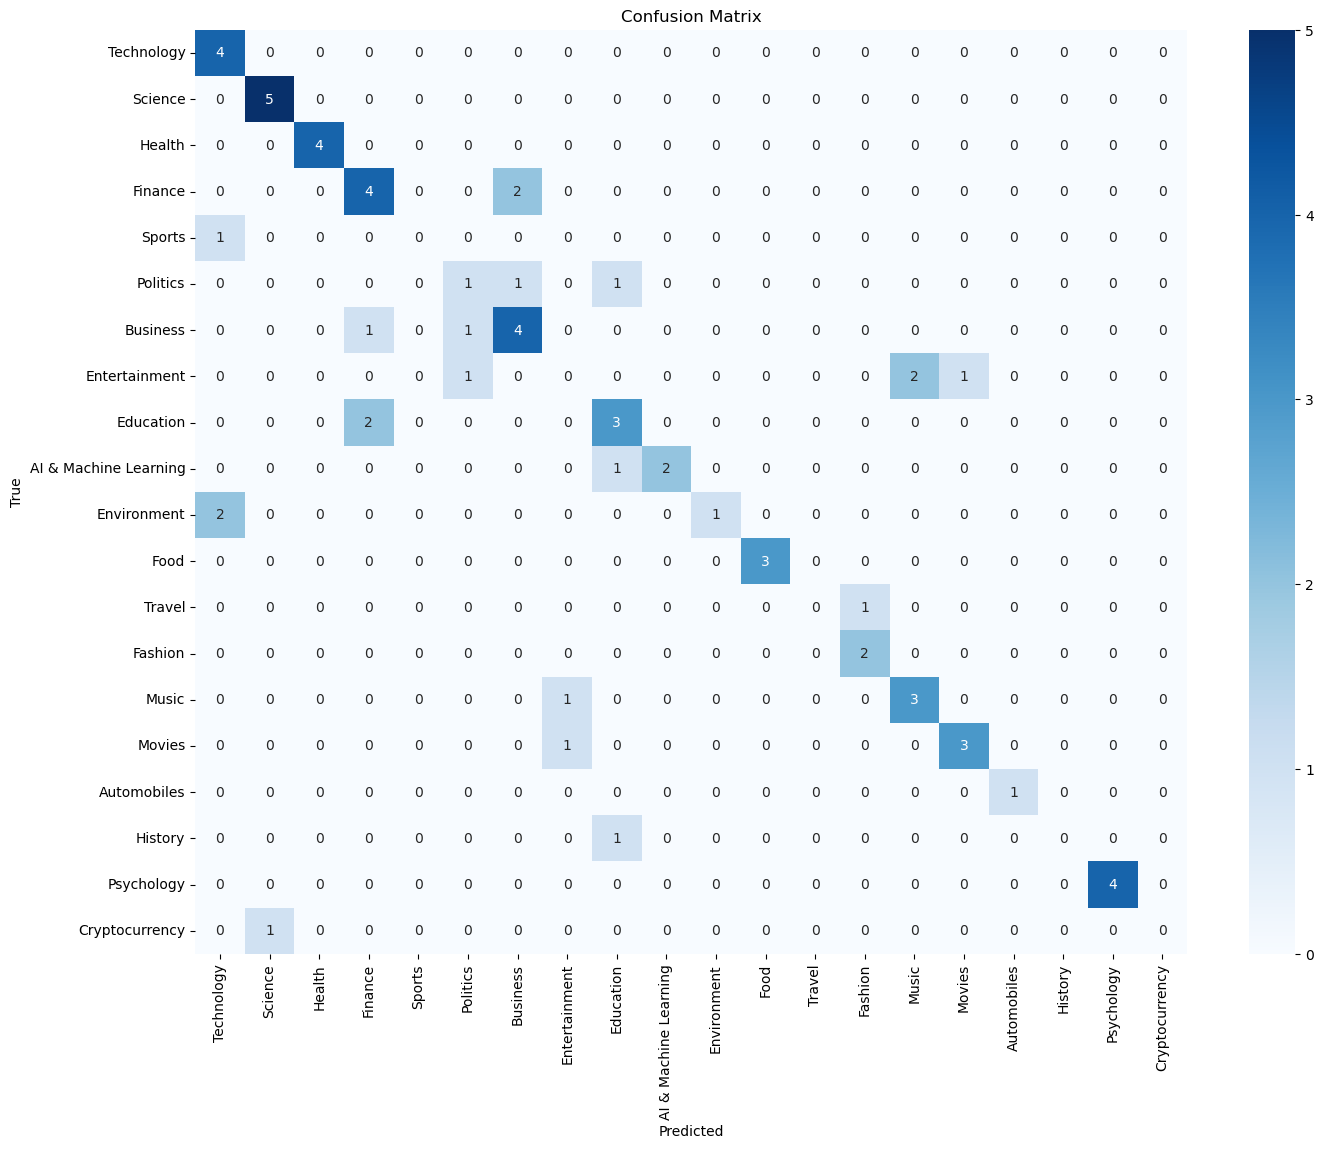

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

model.eval()
all_preds = []
all_true = []

with torch.no_grad():
    for vectors, labels in test_loader:
        vectors = vectors.to(device)
        outputs = model(vectors)
        preds = torch.argmax(outputs, dim=1)
        all_preds.append(preds.cpu().numpy())
        all_true.append(labels.cpu().numpy())

all_preds = np.concatenate(all_preds, axis=0)
all_true = np.concatenate(all_true, axis=0)

# Compute the confusion matrix
cm = confusion_matrix(all_true, all_preds)

# Compute accuracy, precision, recall, and F1-score
accuracy = accuracy_score(all_true, all_preds)
precision = precision_score(all_true, all_preds, average='weighted')  
recall = recall_score(all_true, all_preds, average='weighted')
f1 = f1_score(all_true, all_preds, average='weighted')

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

plt.figure(figsize=(16,12))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=categories, yticklabels=categories)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
